# 🚢 Titanic Survival Analysis – Data Science Project 🚢

This project aims to learn and apply the basic steps of data analysis, with a focus on data cleaning and exploratory data analysis (EDA). The main goal of this project is to help us understand how to work with real-world datasets, identify existing issues, prepare the data, and find important patterns through simple visualizations. The steps involved are:
- Understanding the structure of the dataset by looking at data samples and other information.
- Summarizing basic statistics to understand the data distribution and its characteristics.
- Identifying and handling duplicate data to maintain quality.
- Identifying and selecting the best approach to handle missing values.
- Creating simple visualizations to make data easier to understand.

## Import Libraries

In [699]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### 1. Data Observation: Analysis Using Head, Tail, Sample, and Info

In [700]:
# Import data
df = pd.read_excel('titanic.xlsx')

In [701]:
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [702]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [703]:
df.sample(5)

,survived,name,sex,age
287,0,"Sutton, Mr. Frederick",male,61.0
228,0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0
31,1,"Blank, Mr. Henry",male,40.0
87,1,"Daniel, Mr. Robert Williams",male,27.0
431,1,"Harper, Miss. Annie Jessie ""Nina""",female,6.0


In [704]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
None


#### Observation Results
1. The dataset above contains 500 rows and 4 columns, which are:
   - `survived` (survived or not)
   - `name` (passenger name)
   - `sex` (gender)
   - `age` (age)
2. The `sex` column has two categories: male and female.
3. The `survived` column contains 0 (not survived) and 1 (survived).
4. The `age` column has 49 missing values (NaN).

### 2. *Statistical Summary* of the Dataset Based on Initial Observation

In [705]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

=== Passenger Survival ===
survived
1    270
0    230
Name: count, dtype: int64


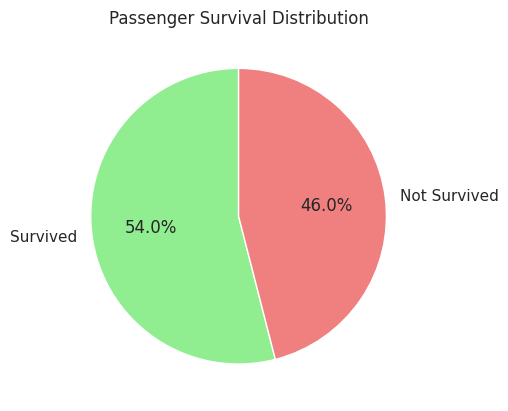

In [706]:
print("=== Passenger Survival ===")
print(df['survived'].value_counts())

# Pie chart for the survival distribution
survival_counts = df['survived'].value_counts()

# Plot pie chart with specified colors: green for survived, red for not survived
survival_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'],
                         labels=['Survived', 'Not Survived'])
plt.title('Passenger Survival Distribution')
plt.ylabel('')  # Hides the y-axis label
plt.show()

=== Gender ===
sex
male      288
female    212
Name: count, dtype: int64


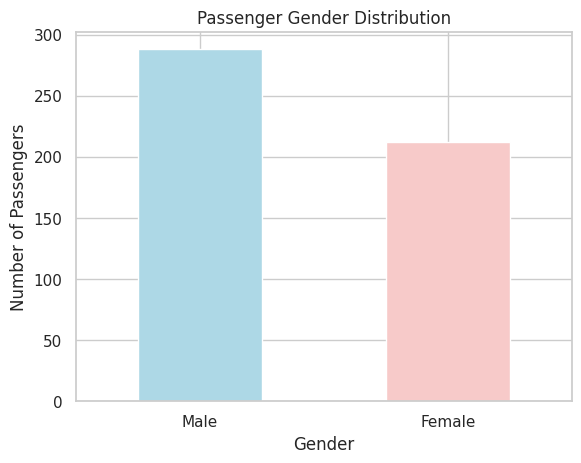

In [707]:
print("=== Gender ===")
print(df['sex'].value_counts())

# Bar plot for the gender distribution of passengers
sex_counts = df['sex'].value_counts()

# Plot the bar chart to compare the number of males and females
sex_counts.plot(kind='bar', color=['#ADD8E6', '#F7CAC9'])  # #ADD8E6 for males (Light Blue), #F7CAC9 for females (Rose Quartz)
plt.title('Passenger Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)

plt.show()

=== Passenger Age ===
count    451.000000
mean      35.917775
std       14.766454
min        0.666700
25%       24.000000
50%       35.000000
75%       47.000000
max       80.000000
Name: age, dtype: float64
=== Passenger Age Groups ===
age_group
Adults       380
Teenagers     29
Elderly       24
Children      18
Name: count, dtype: int64


<ipython-input-708-07c2ffa7ffc1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='Set1')


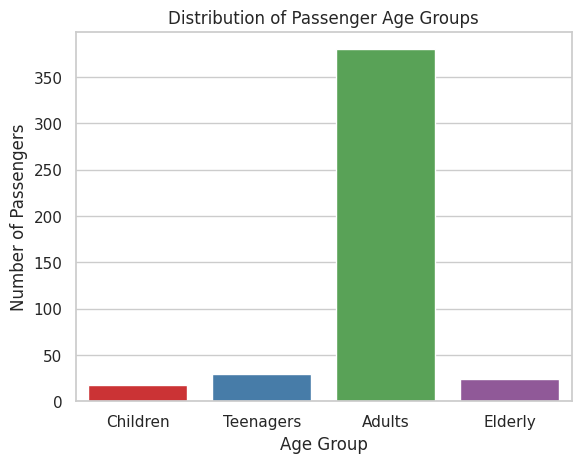

In [708]:
# Statistical summary for the numeric column (age)
print("=== Passenger Age ===")
print(df['age'].describe())  # This gives the mean, std, min, max, and quartiles

# Creating the 'age_group' column based on age
bins = [0, 12, 18, 60, 100]
labels = ['Children', 'Teenagers', 'Adults', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Displaying the distribution of passenger age groups
print("=== Passenger Age Groups ===")
print(df['age_group'].value_counts())

# Bar plot for the distribution of passenger age groups
sns.countplot(x='age_group', data=df, palette='Set1')
plt.title('Distribution of Passenger Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.show()

### 3. Duplicate Handling

In [709]:
len(df.drop_duplicates()) / len(df)
# If the output of this code is not 1, then there are duplicates

0.998

In [710]:
# Make sure the 'age_group' column is calculated after modifying the 'age' column
bins = [0, 12, 18, 60, 100]
labels = ['Children', 'Teenagers', 'Adults', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 1: Get duplicate rows based on 'name', 'sex', and 'age' only
duplicates = df[df.duplicated(subset=['name', 'sex', 'age'], keep=False)]

# Step 2: Calculate the frequency of each duplicate row
duplicate_counts = duplicates.groupby(['name', 'sex', 'age']).size().reset_index(name='duplicate_count')

# Step 3: Sort by the number of duplicates
sorted_duplicates = duplicate_counts.sort_values(by='duplicate_count', ascending=False)

# Display the result
print(sorted_duplicates)

                             name     sex   age  duplicate_count
0  Eustis, Miss. Elizabeth Mussey  female  54.0                2


In [711]:
# Handling drop duplicate
df = df.drop_duplicates()

In [712]:
len(df.drop_duplicates()) / len(df)

1.0

### 4. Missing Value Handling

In [713]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,49
age_group,49


In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   499 non-null    int64   
 1   name       499 non-null    object  
 2   sex        499 non-null    object  
 3   age        450 non-null    float64 
 4   age_group  450 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 20.2+ KB


In [715]:
# Using mode for object columns and median for numeric columns
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        # If the column is of type object or category, fill missing values with the mode
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # If the column is numeric, fill missing values with the median
        df[column] = df[column].fillna(df[column].median())

<ipython-input-715-7589bab3d76e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].median())
<ipython-input-715-7589bab3d76e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])


In [716]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,0
age_group,0


In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   499 non-null    int64   
 1   name       499 non-null    object  
 2   sex        499 non-null    object  
 3   age        499 non-null    float64 
 4   age_group  499 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 20.2+ KB


### Final Data Visualization and Analysis Results

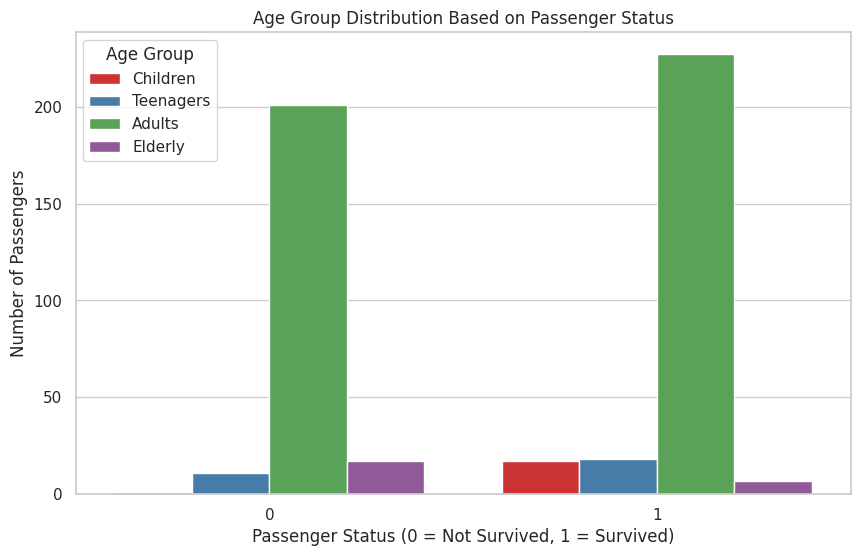

In [718]:
# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Age Distribution Based on Passenger Status
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='age_group', data=df, palette='Set1')
plt.title('Age Group Distribution Based on Passenger Status')
plt.xlabel('Passenger Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.legend(title='Age Group')
plt.show()

Based on the chart above, it can be seen that passengers from the adult age group are the most numerous, both among those who survived and those who did not. However, the number of adults who survived is greater than those who did not. The child and teenager groups also show a higher number of survivors compared to non-survivors, although their total numbers are much smaller than the adults. This could suggest that priority for rescue might have been given to younger age groups. Meanwhile, the elderly group had more non-survivors than survivors, which could be due to physical limitations or difficulties during the evacuation process. Overall, this chart indicates that the age of passengers could influence their likelihood of survival.

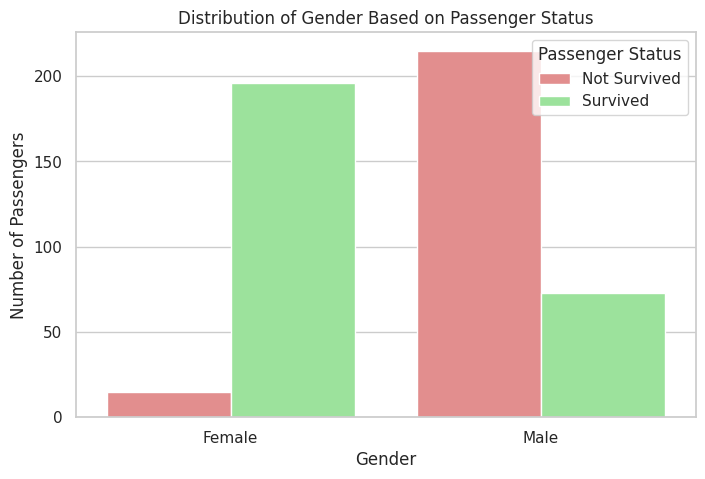

In [719]:
# 2. Gender Distribution Based on Passenger Status
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='survived', data=df, palette={0: 'lightcoral', 1: 'lightgreen'})
plt.title('Distribution of Gender Based on Passenger Status')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Status', labels=['Not Survived', 'Survived'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

Based on the chart above, it can be seen that the number of female passengers who survived is much higher than those who did not. In contrast, more male passengers did not survive compared to those who survived. This pattern suggests that females had a greater chance of survival than males. This difference may be due to priority being given to females during the rescue process, such as the "women and children first" policy during evacuation. This explains why the number of females who survived is significantly higher, while males tend to have a higher number of non-survivors.

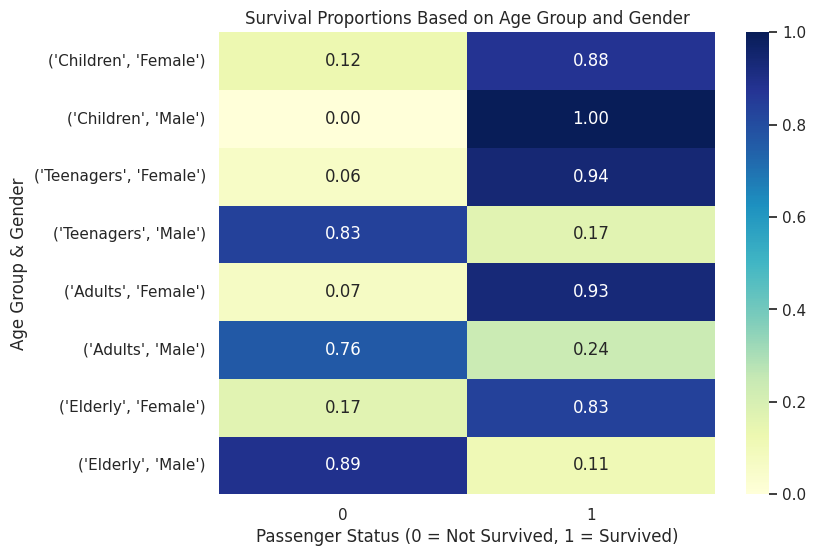

In [720]:
# Standardize 'sex' column to ensure it's either 'Male' or 'Female'
df['sex'] = df['sex'].apply(lambda x: 'Female' if x == 'female' else 'Male' if x == 'male' else x)

# Creating a crosstab to calculate the survival proportions based on age group and gender
crosstab = pd.crosstab([df['age_group'], df['sex']], df['survived'], normalize='index')

# Renaming the index for better descriptiveness (male/female)
crosstab.index = [(age, 'Female') if sex == 'Female' else (age, 'Male')
                  for age, sex in crosstab.index]

# Visualization using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Proportions Based on Age Group and Gender')
plt.xlabel('Passenger Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Age Group & Gender')
plt.show()

Based on the heatmap visualization above, there is a noticeable difference in the survival proportions of passengers based on age groups and gender. Generally, females have a higher survival rate compared to males, especially in the teenage and adult age groups. Teenage girls have an exceptionally high survival rate, reaching around 94%, while teenage boys only have about a 17% survival rate. A similar trend is observed in the adult group, where almost all adult females survived (about 93%), while only around 24% of adult males survived.

Interestingly, in the child group, fewer girls survived (around 12%) compared to boys, with no boys surviving in this dataset. In the elderly group, elderly females had a relatively low survival rate (around 17%), while elderly males had a much higher survival rate, reaching about 89%.

From these findings, it can be concluded that passenger survival in this incident was greatly influenced by gender and age group. Females, particularly those in the teenage and adult groups, were more likely to be saved, likely due to the priority given to females and children during the rescue efforts. However, children and the elderly exhibited different survival patterns, which may be attributed to other factors such as rescue policies, physical conditions, or the limited capacity for evacuation at the time.